In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [14]:
df.head()

,collection_name,asset_id,asset_name,owner_username,owner_address,event_timestamp,event_type
0,Azuki,204260880,Azuki #7389,Asbestosflaygon,0x71e4f7be81da684f0c4c51fe23bca5548f1b3139,2022-06-17 10:51:29.554915,created
1,Azuki,206851735,Azuki #9420,Pirate_Clan,0xf6a325cef74fb60a685bdd5a79ded1ffe45996e8,2022-06-17 10:41:54.631610,created
2,Azuki,209074014,Azuki #9940,NaN,0xe25d0b528c26f8b4580f3acc8dcce16fa82e2dda,2022-06-17 10:06:15.254530,created
3,Azuki,204258515,Azuki #6217,SLvault,0xbb1467320d444d5983589634535d07ae83a40508,2022-06-17 10:03:08.497890,created
4,Azuki,208013884,Azuki #9873,GuyV,0x77033b32cde55ce25ead5bc33b6b6781e5e7a1d2,2022-06-17 09:09:51.282640,created


In [15]:
#df = df[(df['event_timestamp'] > '2022-01-17T10:00:00') & (df['event_timestamp'] < '2022-02-17T12:00:00')]

In [16]:
df.set_index(df['event_timestamp'], inplace=True)

In [17]:
df = df[df['event_type'] == 'successful']

az_df = df[df['collection_name'] == 'Azuki']
ba_df = df[df['collection_name'] == 'Bored Ape Yacht Club']
mf_df = df[df['collection_name'] == 'mfers']
cc_df = df[df['collection_name'] == 'Crypto Coven']


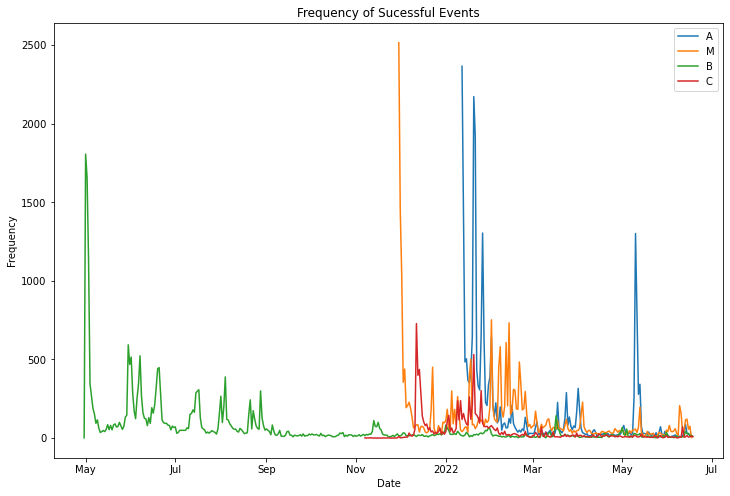

In [18]:
azuki = df[df['collection_name'] == 'Azuki']
azuki = azuki.resample('D').apply({'asset_id':'count'})

mfers = df[df['collection_name'] == 'mfers']
mfers = mfers.resample('D').apply({'asset_id':'count'})

cc = df[df['collection_name'] == 'Crypto Coven']
cc = cc.resample('D').apply({'asset_id':'count'})

BAYC = df[df['collection_name'] == 'Bored Ape Yacht Club']
BAYC = BAYC.resample('D').apply({'asset_id':'count'})

fig = plt.figure(figsize=(12, 8))
plt.plot(azuki)
plt.plot(mfers)
plt.plot(BAYC)
plt.plot(cc)


plt.title('Frequency of Sucessful Events')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.legend('AMBC')
plt.show()